## Modelos Predictivos Extracción de Sacarosa Molinos Tandem "B"

Se presenta un análisis para estimar un modelo lineal para la ***extracción de sacarosa*** del tándem en función de variables de decisión controlables y no controlables.
- Las variables de decisión *controlables*, tales como *torques* y *agua de imbibición*, son aquellas sobre las cuales se tiene control.
- Las variables de decisión *no controlables*, tales como *% fibra en caña*, *% bagazo en caña* y *rendimiento de caña*, son aquellas sobre las cuales no se tiene control y están dadas en un instante específico.

El objetivo del análisis es encontrar un modelo lineal con la suficiente precisión para poder funcionar como una **función objetivo** en un problema de *Optimización Lineal* que permita recomendar valores para las variables de decisión controlables. Es decir, dados valores para las variables no controlables, encontrar los valores para las variables controlables que *maximicen* la extracción de sacarosa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_percentage_error

### Conjunto de Datos
El conjunto de datos lo forman las variables de proceso del piso de planta relacionadas al proceso de *Extracción de Jugo* agregadas en promedios diarios, así como las variables de Laboratorio diarias relacionadas.

Se estiman las siguientes cantidades útiles para el modelo:
- **Torque Total**: Suma de los torques individuales de los molinos.
- **Ratio de Molienda**: Se estima a partir de la báscula de bagazo y del % de bagazo en la caña.
- **Imbibición % Fibra**: Se estima a partir del flujo volumétrico de agua de imbibición, la báscula de bagazo, el % de bagazo en caña y el % de fibra en caña.

In [2]:
df = pd.read_csv(r'Data/Tandem_B.csv')
df.drop(['Inicio','Fin'], axis=1,inplace=True)
df = df.astype(float)
df.fillna(df.mean(),inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)
df['Torque Total TB'] = df['TQ55N101'] + df['TQ55N201'] + df['TQ55N301'] + df['TQ55N401'] + df['TQ55N501'] + df['TQ55N601']
df['Ratio Molienda TB'] = df['WT555802'] / (df['bagazo % caña tb']/100)
df['Imbibicion Fibra TB'] = (df['FT553702'] * 0.227 * 24) / ((df['WT555802'] / (df['bagazo % caña tb'] / 100) * 24) * (df['fibra caña tb']/100))*100
df

,Dia,JT55N101,JT55N201,JT55N301,JT55N401,JT55N501,JT55N601,ST55N101,ST55N201,ST55N301,...,Pol Jugo diluido TB ponderado,caña molida tb,Pol Jugo residual tb ponderado,kg/t Core Sampler TB,extraccion sacarosa tb,extraccion normal tb,Pol bagazo tb ponderado,Torque Total TB,Ratio Molienda TB,Imbibicion Fibra TB
0,2.0,1018.777442,959.459664,0.000000,0.000000,0.000000,523.479589,760.707130,751.446492,803.997325,...,11.4213,10041.97,1.8600,122.4836,96.2662,85.0030,1.3891,7360.924332,418.419826,228.788652
1,3.0,928.998595,792.467656,0.001421,0.000000,0.000000,521.645353,714.447380,676.694646,712.263736,...,12.0803,8896.98,1.9814,121.7932,97.0667,83.5097,1.3846,7229.605759,501.541387,228.737207
2,4.0,1065.451729,939.199752,0.000000,0.000000,0.000000,628.699899,760.186631,782.108624,849.383284,...,11.3005,12797.00,1.6813,127.7916,97.4351,88.7111,1.2901,8550.832960,627.568405,244.426895
3,5.0,959.517790,772.382000,0.001573,0.000000,0.000000,549.926724,694.748632,598.443726,799.265748,...,12.7005,9630.72,1.5925,134.1091,97.6521,85.8780,1.2796,7496.831657,606.118988,251.625749
4,6.0,914.204728,850.927330,0.000357,0.000000,0.000000,517.062259,662.263471,640.567991,757.045645,...,12.7523,12643.03,1.7950,138.4180,97.6234,86.0347,1.2626,7548.727979,560.040088,220.518837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,117.0,940.656775,846.857360,856.329458,623.934093,577.220513,542.683994,667.327445,591.418352,743.062896,...,11.9295,13769.42,1.7650,123.8544,97.1267,86.0687,1.3515,7704.081770,523.921896,252.889139
116,118.0,1047.838531,949.201853,889.963283,641.540540,596.758832,603.098491,773.309858,674.969938,849.356193,...,11.3117,15563.91,1.7275,121.4578,97.0411,83.2954,1.3173,8491.887566,570.275545,243.216721
117,119.0,986.655330,889.141513,844.796890,652.966454,606.736693,603.865897,716.102265,627.548614,789.788022,...,11.9101,14866.28,1.9614,125.1235,96.9693,82.5541,1.4117,8182.159908,553.318375,250.533650
118,120.0,973.856441,888.518247,861.314004,626.703319,594.562745,551.886713,753.527455,675.072979,836.261229,...,11.4491,13998.46,1.8488,121.1672,96.8464,81.5816,1.3583,8047.873668,530.254294,256.139595


### Análisis de Correlación Variables Controlables

La estimación de la función objetivo implica encontrar coeficientes en la función lineal que tengan sentido físico, ya que la dirección de causalidad se conoce. Variables que están muy correlacionadas pueden provocar errores en la estimación del signo de los coeficientes, por lo que encontrar estas correlaciones y poderlas modelar correctamente ayudará a estimar un modelo lineal más acorde a la realidad.

In [3]:
df_correlation = df[['Torque Total TB','TQ55N101','TQ55N201','TQ55N301','TQ55N401','TQ55N501','TQ55N601','fibra caña tb','FT553702','extraccion sacarosa tb','WT555802','bagazo % caña tb','caña molida tb']]
df_correlation.corr()

,Torque Total TB,TQ55N101,TQ55N201,TQ55N301,TQ55N401,TQ55N501,TQ55N601,fibra caña tb,FT553702,extraccion sacarosa tb,WT555802,bagazo % caña tb,caña molida tb
Torque Total TB,1.000000,-0.007925,1.000000,0.059626,0.039307,-0.029818,0.035128,0.006026,-0.009277,-0.036561,-0.015605,-0.007346,0.005718
TQ55N101,-0.007925,1.000000,-0.007927,0.637090,0.651956,0.248013,0.728602,-0.004503,0.752408,0.106208,0.891372,-0.045623,0.679931
TQ55N201,1.000000,-0.007927,1.000000,0.059624,0.039305,-0.029819,0.035126,0.006026,-0.009278,-0.036561,-0.015607,-0.007346,0.005716
TQ55N301,0.059626,0.637090,0.059624,1.000000,0.698307,0.182634,0.695623,-0.115874,0.711464,0.227304,0.696408,-0.168343,0.703840
TQ55N401,0.039307,0.651956,0.039305,0.698307,1.000000,0.054061,0.729611,-0.112136,0.621876,0.089408,0.680094,-0.145600,0.608906
TQ55N501,-0.029818,0.248013,-0.029819,0.182634,0.054061,1.000000,0.176214,-0.058017,0.240511,0.255698,0.415112,0.026078,0.129566
TQ55N601,0.035128,0.728602,0.035126,0.695623,0.729611,0.176214,1.000000,-0.097915,0.658254,0.078723,0.707246,-0.172397,0.674759
fibra caña tb,0.006026,-0.004503,0.006026,-0.115874,-0.112136,-0.058017,-0.097915,1.000000,0.087435,-0.640514,-0.038371,0.956772,-0.133621
FT553702,-0.009277,0.752408,-0.009278,0.711464,0.621876,0.240511,0.658254,0.087435,1.000000,0.125836,0.778840,0.042804,0.641459
extraccion sacarosa tb,-0.036561,0.106208,-0.036561,0.227304,0.089408,0.255698,0.078723,-0.640514,0.125836,1.000000,0.183855,-0.619537,0.141528


### Análisis de Correlación de Variables con Variable Objetivo

En la estimación del modelo lineal es útil conocer las variables que más se correlacionen con la variable objetivo *extracción de sacarosa*.

In [4]:
df.corr()['extraccion sacarosa tb'].abs().sort_values(ascending=False).head(25)

extraccion sacarosa tb            1.000000
kg/t Core Sampler TB              0.649577
fibra caña tb                     0.640514
bagazo % caña tb                  0.619537
Pol bagazo tb ponderado           0.609476
Pol Jugo residual tb ponderado    0.396556
Ratio Molienda TB                 0.371722
extraccion normal tb              0.338126
Pol  Jugo diluido TB ponderado    0.335729
TQ55N501                          0.255698
ST55N301                          0.248012
TQ55N301                          0.227304
FT555802                          0.214706
WT555802                          0.183855
caña molida tb                    0.141528
JT55N201                          0.138044
FT553702                          0.125836
JT55N601                          0.118915
ST55N601                          0.107142
ST55N501                          0.106353
TQ55N101                          0.106208
JT55N101                          0.104981
Dia                               0.103459
TQ55N401   

### Estimación del Modelo Lineal para Función Objetivo

Se realizan experimentos para encontrar los términos significativos de la función lineal, tomando en cuenta la correlación de variables de forma que los coeficientes tengan sentido físico. El objetivo es encontrar una *función lineal* que prediga con *suficiente precisión* la extracción de sacarosa del tándem y que además *incluya variables controlables*.

In [5]:
# Multivariate OLS
OLS_extraction_model = smf.ols("Q('extraccion sacarosa tb') ~ Q('Torque Total TB') + Q('Imbibicion Fibra TB') + Q('fibra caña tb') + Q('kg/t Core Sampler TB')",data=df).fit_regularized(alpha=0.000000035,L1_wt=0)

# Predicciones
df['extraccion sacarosa tb predicciones'] = OLS_extraction_model.predict(df)
mape = np.round(100*mean_absolute_percentage_error(df['extraccion sacarosa tb'], df['extraccion sacarosa tb predicciones']),3)

regularized_regression_parameters = OLS_extraction_model.params

print("Coeficientes del Modelo Lineal: ",regularized_regression_parameters)
print("Error Porcentual Medio del Modelo Lineal: ", mape)



Coeficientes del Modelo Lineal:  [ 9.58167929e+01  1.30564865e-11  2.17531435e-03 -2.10645544e-01
  2.90500395e-02]
Error Porcentual Medio del Modelo Lineal:  0.096


<Axes: title={'center': 'Extracción Sacarosa TB. MAPE: 0.096 %.'}>

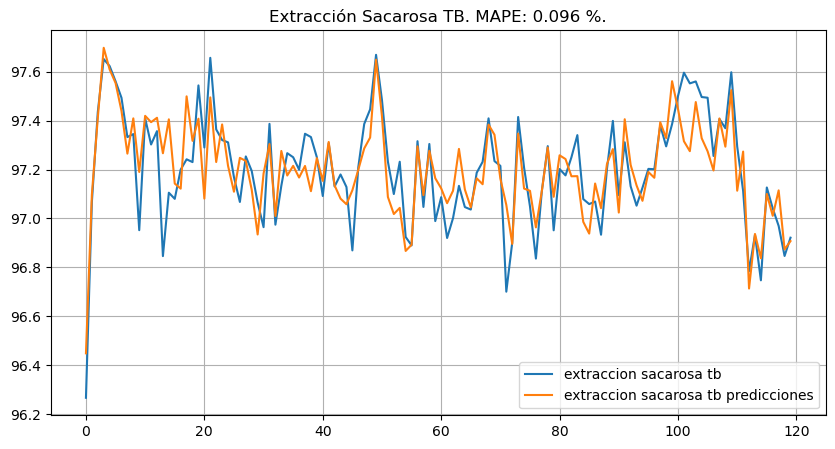

In [6]:
# Gráfica de Predicción
df[['extraccion sacarosa tb','extraccion sacarosa tb predicciones']].plot(figsize=(10,5), grid=True, title = f'Extracción Sacarosa TB. MAPE: {mape} %.')

El modelo lineal se construye con las siguientes variables:
 - **Controlables**: Torque total (Suma de Torques M1, M2, M3, M4, M5 y M6), Imbibición % Fibra.
 - **No Controlables**: % Fibra en Caña, Rendimiento Caña.

### Restricciones

La extracción de sacarosa es función de las variables anteriormente identificadas, pero sujeta a condiciones operativas. Algunas de estas condiciones son limites duros de operación, como torques máximos de reductores y potencias máximas de motores eléctricos, sin embargo existen otras que es necesario modelar en función de las variables controlables para utilizarlas como *restricciones* en el probema de optimización. Las siguientes restricciones son modeladas a continuación:

- Ratio de Molienda.
- Humedad del Bagazo.


#### Ratio de Molienda

Se inicia con un análisis de correlación para encontrar variables candidatas.

In [7]:
df.corr()['Ratio Molienda TB'].abs().sort_values(ascending=False).head(25)

Ratio Molienda TB                      1.000000
WT555802                               0.941424
FT555802                               0.912132
TQ55N101                               0.841141
ST55N601                               0.829002
JT55N101                               0.815703
JT55N201                               0.795185
JT55N601                               0.787928
caña molida tb                         0.742854
ST55N401                               0.724231
TQ55N601                               0.713067
FT553702                               0.706485
TQ55N301                               0.702327
TQ55N401                               0.680724
ST55N101                               0.666247
ST55N201                               0.594052
ST55N301                               0.549322
ST55N501                               0.399502
extraccion sacarosa tb predicciones    0.382423
bagazo % caña tb                       0.380335
TQ55N501                               0

#### Modelo Lineal Ratio de Molienda

Coeficientes del Modelo Lineal:  [ 5.28199559e+02  1.88219396e-01 -3.71569031e-09  5.51366311e-02
  6.46980777e-02  6.04199874e-02  6.54760007e-03 -3.91315483e+01]
Error Porcentual Medio del Modelo Lineal:  3.361


<Axes: title={'center': 'Ratio Molienda TB MAPE: 3.361 %.'}>

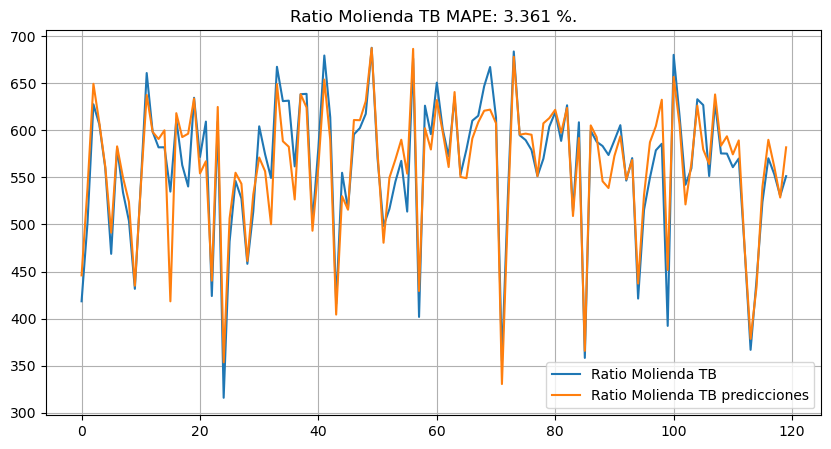

In [8]:
### Ratio de Molienda
OLS_caña_model = smf.ols("Q('Ratio Molienda TB') ~ TQ55N101 + TQ55N201 + TQ55N301 + TQ55N401 + TQ55N501 + TQ55N601 + Q('fibra caña tb')",data=df).fit_regularized(alpha=0.000005,L1_wt=0)

# Predicciones
df['Ratio Molienda TB predicciones'] = OLS_caña_model.predict(df)
mape = np.round(100*mean_absolute_percentage_error(df['Ratio Molienda TB'], df['Ratio Molienda TB predicciones']),3)
print("Coeficientes del Modelo Lineal: ",OLS_caña_model.params)
print("Error Porcentual Medio del Modelo Lineal: ", mape)

# Gráfica de Predicción
df[['Ratio Molienda TB','Ratio Molienda TB predicciones']].plot(figsize=(10,5), grid=True, title = f'Ratio Molienda TB MAPE: {mape} %.')

#### Humedad de Bagazo

Se inicia con un análisis de correlación para encontrar variables candidatas.

In [9]:
df.corr()['Humedad bagazo B ponderado'].abs().sort_values(ascending=False).head(25)

Humedad bagazo B ponderado             1.000000
Dia                                    0.585113
JT55N401                               0.480003
JT55N301                               0.464532
JT55N501                               0.452136
Pol Jugo residual tb ponderado         0.412200
Pol bagazo tb ponderado                0.307367
TQ55N501                               0.282257
TQ55N601                               0.278495
bagazo % caña tb                       0.253879
caña molida tb                         0.244381
kg/t Core Sampler TB                   0.210501
JT55N601                               0.204850
TQ55N301                               0.180795
ST55N201                               0.170176
extraccion sacarosa tb predicciones    0.157915
TQ55N101                               0.133371
FT555802                               0.132865
FT553702                               0.123219
TQ55N401                               0.121596
Ratio Molienda TB                      0

#### Modelo Lineal Humedad de Bagazo

Coeficientes del Modelo Lineal:  [ 4.73046858e+01  1.15348642e-04 -2.48697368e-04  7.95713706e-04
  1.92101683e+00 -8.77759126e-05 -3.80080926e+00]
Error Porcentual Medio del Modelo Lineal:  0.158


<Axes: title={'center': 'Humedad de Bagazo TB (%). MAPE: 0.158 %.'}>

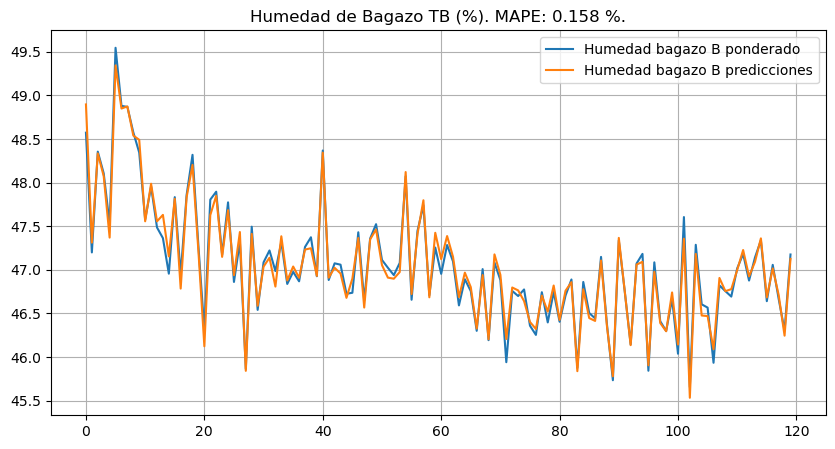

In [10]:
# Modelo Predictivo: Humedad de Bagazo (%)
OLS_humidity_model = smf.ols("Q('Humedad bagazo B ponderado') ~ TQ55N101 + TQ55N601  + Q('Imbibicion Fibra TB') + Q('bagazo % caña tb') + Dia +  Q('fibra caña tb')",data=df).fit_regularized(alpha=0.000005,L1_wt=0)

# Predicciones
df['Humedad bagazo B predicciones'] = OLS_humidity_model.predict(df)
mape = np.round(100*mean_absolute_percentage_error(df['Humedad bagazo B ponderado'], df['Humedad bagazo B predicciones']),3)
print("Coeficientes del Modelo Lineal: ",OLS_humidity_model.params)
print("Error Porcentual Medio del Modelo Lineal: ", mape)

# Gráfica de Predicción
df[['Humedad bagazo B ponderado','Humedad bagazo B predicciones']].plot(figsize=(10,5), grid=True, title = f'Humedad de Bagazo TB (%). MAPE: {mape} %.')